In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
x1 = np.array([df['x1']]).T
x2 = np.array([df['x2']]).T
x3 = np.array([df['x3']]).T
X = np.array([df['x1'], df['x2'], df['x3']]).T
y = df['y'].values

Estimated coefficients of the model:  [-2.03833663]
Independent term in the linear model:  5.927948918061611
The value of new x1:  [3.88961228 1.85127565]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


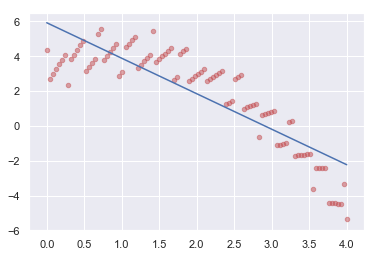

In [4]:
## Question 1:
## Run a simple linear regression model to predict y from x1. 
## Report the linear model you found. 
## Predict the value of y for a new x1 values of 1 and 2 respectively.
## 
## Your code here
##

from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
%matplotlib inline

model_1 = linear_model.LinearRegression()
model_1.fit(x1,y)
print("Estimated coefficients of the model: ", model_1.coef_) 
print("Independent term in the linear model: ", model_1.intercept_)
y_pred = model_1.predict(x1)
plt.plot(x1,y_pred)
plt.scatter(x1,y,c='r',s=20,alpha=0.5)


new_x1=np.array([[1],[2]])
print("The value of new x1: ", model_1.predict(new_x1))

In [5]:
## Question 2:
## Use cross-validation to predict generalization error, 
## while the error of a single data point (x1, y) from a model M is defined as (M(x1)−y)^2. 
## Describe how you did this.
## 
## Your code here
##

## Option 1: K-fold Cross Validation
from sklearn import linear_model
from sklearn import model_selection
MSE_all = 0.0
K = 5
kf = model_selection.KFold(n_splits=K, shuffle=True)
for train_index, test_index in kf.split(x1,y):
    x1_train, x1_test = x1[train_index], x1[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model_1 = linear_model.LinearRegression(fit_intercept=True, normalize=False)
    model_1.fit(x1_train,y_train)
    y_pred = model_1.predict(x1_test)
    from sklearn.metrics import mean_squared_error
    MSE = mean_squared_error(y_test, y_pred)
    print('Generalization error on the test set is %.5f.'% MSE)
    MSE_all += MSE
print(MSE_all / K)
    

# Option 2: Split Validation
from sklearn.model_selection import train_test_split
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size =.3, random_state=1)

from sklearn import linear_model
model_1 = linear_model.LinearRegression(fit_intercept=True, normalize=False)
model_1.fit(x1_train,y_train)

y_pred = model_1.predict(x1_test)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print('Generalization error on the test set is %.5f.'% MSE)

Generalization error on the test set is 1.61762.
Generalization error on the test set is 2.63475.
Generalization error on the test set is 2.13013.
Generalization error on the test set is 1.90596.
Generalization error on the test set is 2.29311.
2.116316805751582
Generalization error on the test set is 2.37834.


In [6]:
## Question 3:
## Predict y from x1 by consturcting polynomial regression models with degree of 2, 3, and 4 respectively.
## Report polynomial models with the above three degrees. 
## With each of these models, predict the value of y for a new x1 values of 1 and 2 respectively.
## 
## Your code here
##

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


model_2= Pipeline([('poly', PolynomialFeatures(degree=2)),
           ('linear',linear_model.LinearRegression())])

model_3= Pipeline([('poly', PolynomialFeatures(degree=3)),
           ('linear',linear_model.LinearRegression())])

model_4= Pipeline([('poly', PolynomialFeatures(degree=4)),
           ('linear',linear_model.LinearRegression())])

model_2.fit(x1,y)
model_3.fit(x1,y)
model_4.fit(x1,y)

print("Estimated coefficients: (Degree 2): ", model_2.named_steps['linear'].coef_) 
print("Independent term (Degree 2): ", model_2.named_steps['linear'].intercept_)
print("Estimated coefficients: (Degree 3): ", model_3.named_steps['linear'].coef_) 
print("Independent term (Degree 3): ", model_3.named_steps['linear'].intercept_)
print("Estimated coefficients: (Degree 4): ", model_4.named_steps['linear'].coef_) 
print("Independent term (Degree 4): ", model_4.named_steps['linear'].intercept_)

print()
new_x1=np.array([[1],[2]])
print("[polynomial regression models with degree of 2] The value of new x1: ", model_2.predict(new_x1))
print("[polynomial regression models with degree of 3] The value of new x1: ", model_3.predict(new_x1))
print("[polynomial regression models with degree of 4] The value of new x1: ", model_4.predict(new_x1))

Estimated coefficients: (Degree 2):  [ 0.          1.98367369 -1.00550258]
Independent term (Degree 2):  3.2736929436564806
Estimated coefficients: (Degree 3):  [ 0.00000000e+00  1.97545996e+00 -1.00034312e+00 -8.59910796e-04]
Independent term (Degree 3):  3.2763618344299554
Estimated coefficients: (Degree 4):  [ 0.          2.0444677  -1.0788899   0.02978751 -0.00383093]
Independent term (Degree 4):  3.263185052455023

[polynomial regression models with degree of 2] The value of new x1:  [4.25186406 3.21903   ]
[polynomial regression models with degree of 3] The value of new x1:  [4.25061877 3.21903   ]
[polynomial regression models with degree of 4] The value of new x1:  [4.25471944 3.21356612]


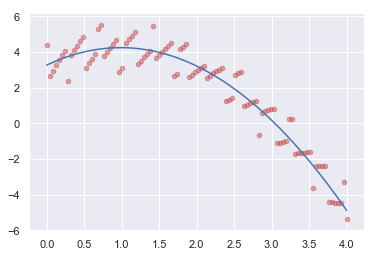

In [7]:
y_pred=model_2.predict(x1)
plt.plot(x1,y_pred)
plt.scatter(x1,y,c='r',s=20,alpha=0.5)

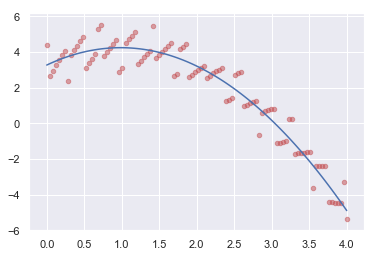

In [8]:
y_pred=model_3.predict(x1)
plt.plot(x1,y_pred)
plt.scatter(x1,y,c='r',s=20,alpha=0.5)

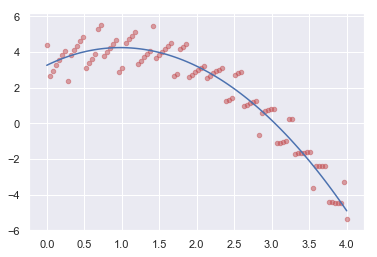

In [9]:
y_pred=model_4.predict(x1)
plt.plot(x1,y_pred)
plt.scatter(x1,y,c='r',s=20,alpha=0.5)

In [10]:
## Question 4:
## Run a simple linear regression model to predict y from X. 
## Report the linear model you found. 
## Predict the value of y for a new X values of (1, 1, 1), (1, 0, 4), and (3, 2, 1) respectively.
##
## your code here
##

model_5 =linear_model.LinearRegression()

model_5.fit(X,y)

print("Estimated coefficients of the model: ", model_5.coef_) 
print("Independent term in the linear model: ", model_5.intercept_)

new_X =np.array([[1,1,1],[1,0,4],[3,2,1]])
print("The value of new x1: ", model_5.predict(new_X))

Estimated coefficients of the model:  [-2.00371927  0.53256334 -0.26560187]
Independent term in the linear model:  5.314167172456982
The value of new x1:  [3.57740937 2.24804044 0.10253417]


In [11]:
## Question 5:
## Use cross-validation to predict generalization error, 
## while the error of a single data point (X, y) from a model M is defined as (M(X)−y)^2. 
## Describe how you did this.
## 
## Your code here
##

## Option 1: K-fold Cross Validation
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
MSE_all = 0.0
K = 5
kf = model_selection.KFold(n_splits=K, shuffle=True)
for train_index, test_index in kf.split(X,y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model_5 = linear_model.LinearRegression(fit_intercept=True, normalize=False)
    model_5.fit(x_train,y_train)
    y_pred = model_5.predict(x_test)
    MSE = mean_squared_error(y_test, y_pred)
    print('Generalization error on the test set is %.5f.'% MSE)
    MSE_all += MSE
print(MSE_all / K)


## Option 2: split validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =.3, random_state=2)

from sklearn import linear_model
model_5 = linear_model.LinearRegression(fit_intercept=True, normalize=False)
model_5.fit(x_train,y_train)
intercept = model_5.intercept_
coef = model_5.coef_

y_pred = model_5.predict(x_test)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print('Generalization error on the test set is %.5f.'% MSE)

Generalization error on the test set is 1.60930.
Generalization error on the test set is 1.68625.
Generalization error on the test set is 1.85704.
Generalization error on the test set is 2.01778.
Generalization error on the test set is 1.38406.
1.7108849474532317
Generalization error on the test set is 1.61844.
